In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Load Data
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['Price'] = california.target

In [3]:
# Split data
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [5]:
# Predict
y_pred = model.predict(X_test)

<h2>Step 2: Calculate Residuals</h2>

In [6]:
#Residuals = actual - predicted
residuals = y_test-y_pred
#Quick Peek
print("\nFirst 5 Residuals: ")
print(pd.DataFrame({'Actaul': y_test[:5],'Predicted': y_pred[:5],'Residual':residuals[:5]}))



First 5 Residuals: 
        Actaul  Predicted  Residual
20046  0.47700   0.719123 -0.242123
3024   0.45800   1.764017 -1.306017
15663  5.00001   2.709659  2.290351
20484  2.18600   2.838926 -0.652926
9814   2.78000   2.604657  0.175343


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Residuals vs Predicted Values')

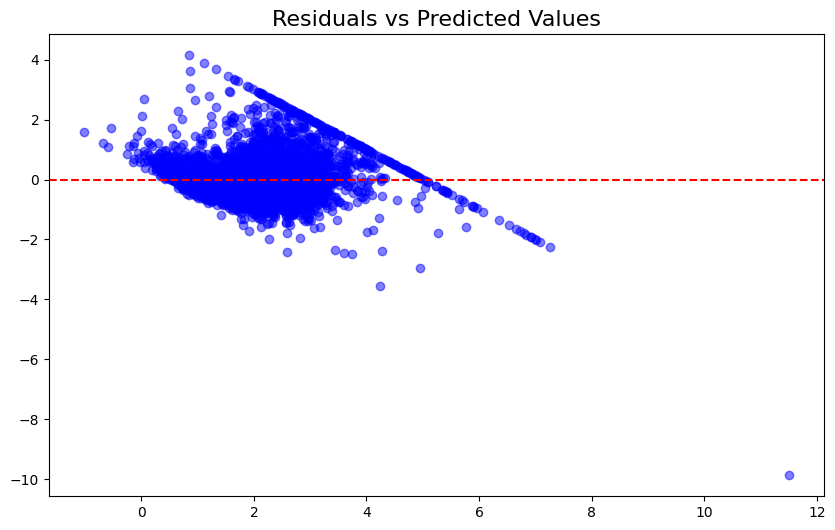

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0,color='red',linestyle='--')# Zero line
plt.title("Residuals vs Predicted Values",fontsize=16)

Plot 2: Histogram Of Residuals

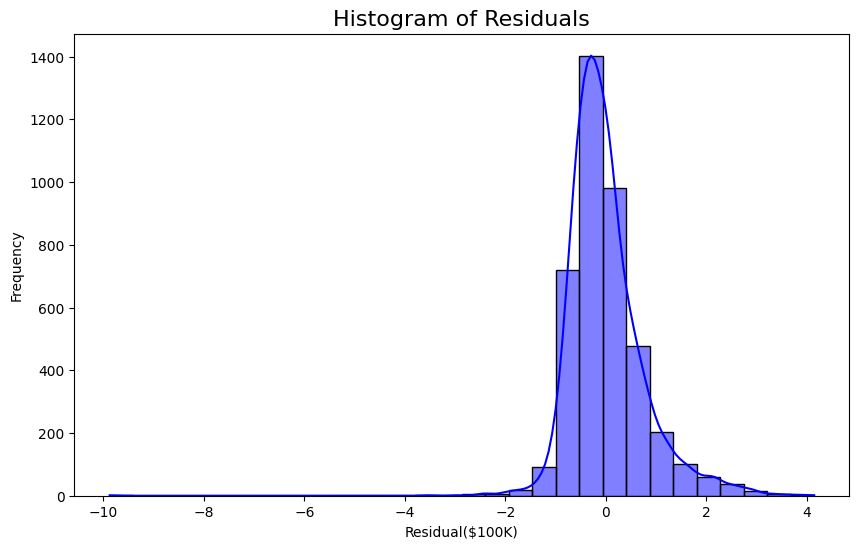

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(residuals,bins=30,kde=True, color='blue')
plt.title("Histogram of Residuals",fontsize=16)
plt.xlabel('Residual($100K)')
plt.ylabel('Frequency')
plt.show()

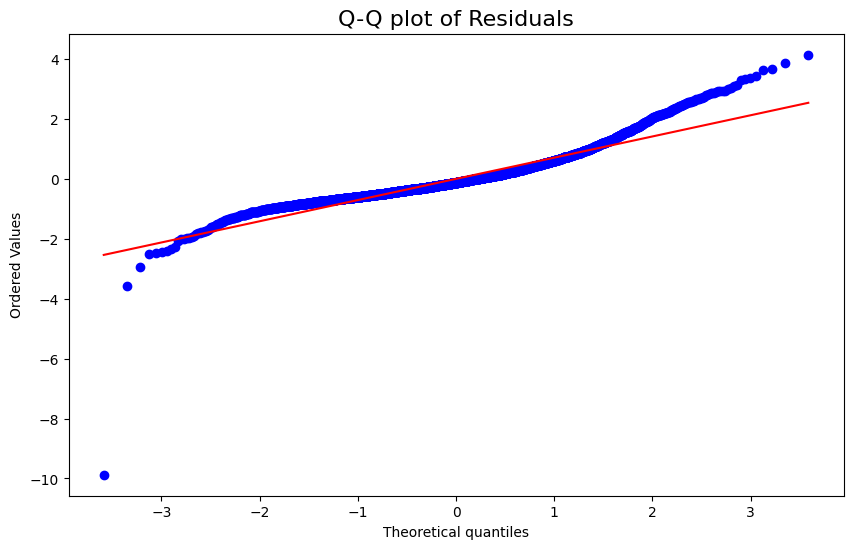

In [12]:
import scipy.stats as stats
plt.figure(figsize=(10,6))
stats.probplot(residuals, dist='norm',plot=plt)
plt.title('Q-Q plot of Residuals', fontsize=16)
plt.show()

Step 4: Interpret Residual Analysis<br><br>
Linearity: Scatter Plot shows no strong curve-assumption holds decently<br><br>
Constant Variance: Slight fanning at higher prices- mild heteroscedasticity(variance grows).<br><br>
Normality: Histogram and Q-Q show approximate normality, but tails suggest outliers or capping($500K limit skews residuals).<br><br>
Takeaway: Model's okay but not perfect

<h1>Standardization Vs Normalization</h1>

Both standardization and normalization are techniques used to scale numberical data in ml. However, they have differnet purposes and mathermatical approcahes

1-Standardization(z-score Scaling)
Standardization transforms the data to have a mean of 0 and a standard deviation of 1<br>
formula:<br>
x(standardized) = X-mean/Standard Deviation<br>
Where:<br>
X = orginal Feature value<br>
mean = Mean of the feature<br>
Standard Deviation = Standard Deviation of feature<br>

2 - Normalization(Min-Max Scaling)<br>
Normalization transforms data into a fixed range, typically[0,1] or[-1,1]<br>
formual:<br>
X(normalized) = X-Xmin/Xmax-Xmin<br>
Where:<br>
X = Orginal Feature value<br>
Xmin = Minimum value in the feature<br>
Xmax = Maximum value in the feature<br>

<h2>Cross-Validation: A Technique to Improve model performance</h2>
Cross-Validation is a tecnhique used to evaluate the performance of a machine learning model by splotting the dataset into multiple subsets for training and testing. THis helps in avoiding overfitting and ensures that the model generalizes well to unseen data

<h1>K - Fold Cross - Validation (Most Common)</h1>

Step 1: Split the dataset into K equal-sized folds<br>
Step 2: Train the model on k-1 folds and test on the remaining fold<br>
Step 3: Repaet the process K-times, ecah time using a different<br>
Step 4: Compute the average performance across all K iteration

Example(K=5)
1. Train on Folds 2,3,4,5 -> Test on Fold 1<br>
2. Train on Folds 1,3,4,5 -> Test on Fold 2<br>
3. Train on Folds 1,2,4,5 -> Test on Fold 3<br>
4. Train on Folds 1,2,3,5 -> Test on Fold 4<br>
5. Train on Folds 1,2,3,4 -> Test on Fold 5<br>

In [13]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

In [14]:
# Generate synthetic data
X,y = make_regression(n_samples=100, n_features=2,noise=50)

In [15]:
# K-Fold Cross-Validation
kf=KFold(n_splits=5, shuffle=True, random_state=42)
model = LinearRegression()

In [16]:
#Perform cross-validation
scores = cross_val_score(model,X,y, cv = kf, scoring='r2')
print("Cross - validation scores: ",scores)
print("Average Score: ",scores.mean())

Cross - validation scores:  [0.73458966 0.76391277 0.56890082 0.83197949 0.84149319]
Average Score:  0.748175183955939
